In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl



## **Test Data  Processing **





In [29]:
td=pd.read_csv('/content/train.csv')

In [30]:
td.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
num_td=td.select_dtypes(include="number")
corr_matrix=num_td.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [32]:
req_traindata = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]


In [33]:
selected_data=td[req_traindata]


In [34]:
selected_data.loc[:,'Totalbath']=(selected_data['BsmtFullBath'].fillna(0)+
                                 selected_data['BsmtHalfBath'].fillna(0)+
                                 selected_data['FullBath'].fillna(0)+
                                 selected_data['HalfBath'].fillna(0))

<ipython-input-34-286a142783b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.loc[:,'Totalbath']=(selected_data['BsmtFullBath'].fillna(0)+


In [35]:
selected_data.loc[:,'Totalarea']=(selected_data['GarageArea'].fillna(0)+
                                  selected_data['OverallQual'].fillna(0)+
                                  selected_data['TotalBsmtSF'].fillna(0)+
                                  selected_data['1stFlrSF'].fillna(0)+
                                  selected_data['2ndFlrSF'].fillna(0)+
                                  selected_data['GrLivArea'].fillna(0))

<ipython-input-35-5412ac0954a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.loc[:,'Totalarea']=(selected_data['GarageArea'].fillna(0)+


In [36]:
selected_data

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,Totalbath,Totalarea
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4831
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,4252
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,5107
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4839
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,6385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4713
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,6194
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,6091
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3479


In [37]:
new_td = selected_data[['TotRmsAbvGrd','Totalbath','GarageArea','Totalarea','OverallQual','SalePrice']]


In [38]:
new_td

,TotRmsAbvGrd,Totalbath,GarageArea,Totalarea,OverallQual,SalePrice
0,8,4,548,4831,7,208500
1,6,3,460,4252,6,181500
2,6,4,608,5107,7,223500
3,7,2,642,4839,7,140000
4,9,4,836,6385,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4713,6,175000
1456,7,3,500,6194,6,210000
1457,9,2,252,6091,7,266500
1458,5,2,240,3479,5,142125


In [39]:
train_set,test_set=train_test_split(new_td,test_size=0.2,random_state=42)

In [40]:
train_set.shape, test_set.shape

((1168, 6), (292, 6))

In [41]:
housing=train_set.drop('SalePrice',axis=1)
house_labels= train_set['SalePrice'].copy()


**Now Pipeline is required for datapoints becaues all pounts are in wide range**

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler() )
])

In [43]:
X_train = my_pipeline.fit_transform(housing)


In [44]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.24603581, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.18597154, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.53671922, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -0.99474394, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.42343494,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.38882957,  0.64257719]])

In [45]:
Y_train=house_labels

In [46]:
Y_train.shape

(1168,)

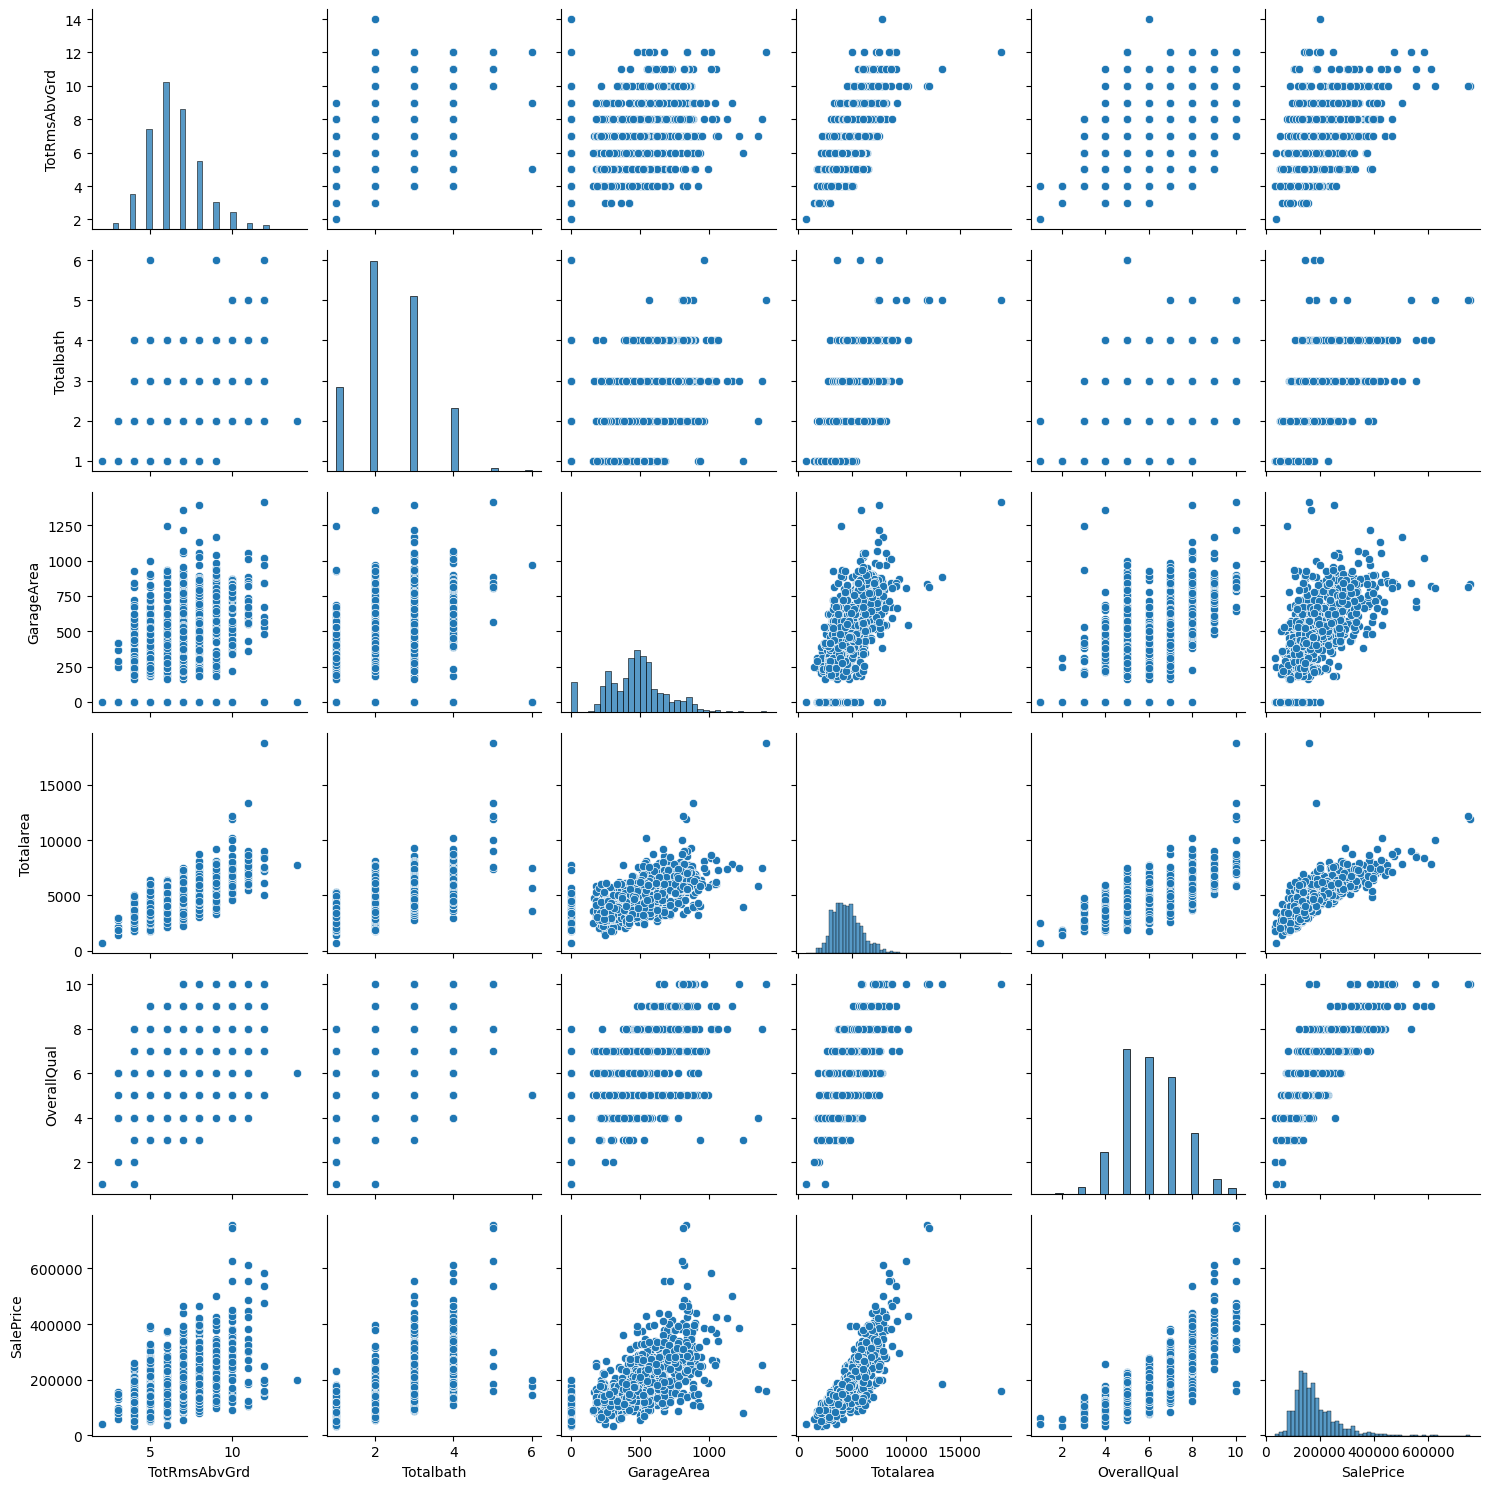

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(new_td)
plt.tight_layout()
plt.show()

<Axes: >

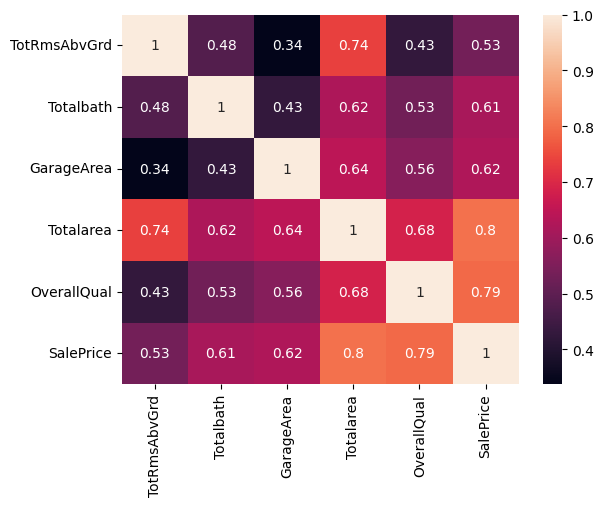

In [48]:
sns.heatmap(new_td.corr(),annot=True)

***Now The Test dataframe ***

In [49]:
testdf = pd.read_csv("/content/test.csv")
testdf.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]>

In [50]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]


In [51]:
selected_tst = testdf[req_tst]


In [52]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                    selected_tst['BsmtHalfBath'].fillna(0) +
                                    selected_tst['FullBath'].fillna(0) +
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +
                                  selected_tst['1stFlrSF'].fillna(0) +
                                  selected_tst['2ndFlrSF'].fillna(0) +
                                  selected_tst['LowQualFinSF'].fillna(0) +
                                  selected_tst['GrLivArea'].fillna(0))

<ipython-input-52-95dded13d5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
<ipython-input-52-95dded13d5a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [53]:
selected_tst


,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [54]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [55]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())


In [56]:
X_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)


In [57]:
X_test

array([[-0.96456591, -1.57881784,  1.2024646 , -1.34046271, -0.82044456],
       [-0.34690528, -0.48377079, -0.77853123, -0.42343494, -0.08893368],
       [-0.34690528,  0.61127627,  0.02713693, -0.28444901, -0.82044456],
       ...,
       [ 0.27075534, -0.48377079,  0.47262403, -0.64343779, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927, -1.21614364, -0.82044456],
       [ 1.50607659,  0.61127627,  0.82332664,  0.28127262,  0.64257719]])

In [58]:
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [59]:
y_train_pred = model.predict(X_train)


In [60]:
y_train_pred[:5]

array([137924.90249174, 175098.65167961,  79786.89870016, 149929.67104588,
       147060.93211086])

In [61]:
some_data = housing.iloc[:5]
some_labels = house_labels.iloc[:5]
proc_data = my_pipeline.transform(some_data)


In [62]:
model.predict(proc_data)


array([137924.90249174, 175098.65167961,  79786.89870016, 149929.67104588,
       147060.93211086])

In [63]:
list(some_labels)


[145000, 178000, 85000, 175000, 127000]

In [64]:
train_mse = mean_squared_error(Y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)
rmse_scores


array([ 16605.14213768,  18247.03188251,  29390.07778408,  30911.5874606 ,
        42530.67870309,  14611.46315422,  28380.28365464,  26094.92850699,
        16435.4314009 ,  44145.63598409,  14408.83520637,  29617.37090538,
        15320.94576744,  20233.18544856,  26817.67718173,  30444.96471012,
        27463.77409947,  49211.12713129,  48816.10675439,  24621.53323906,
        51429.79644011,  16111.49147545,  18304.00565747,  28325.36876687,
        55310.95824997,  13823.3686694 ,  37240.03013379,  22557.41199361,
       122551.7549158 ,  37155.92589869,  16402.7496783 ,  26501.97998166,
        40736.33344998,  26921.73355772,  67637.92543707,  13315.99139855,
        20144.90623804,  28796.21217885,  34553.15082352,  37694.85475875,
        23661.17439493,  19488.42260127,  29320.50512228,  32151.92338307,
        34876.34510482,  38258.84549578,  26392.81425553,  27934.40468823,
        35727.25713659,  26054.31508981,  22637.68004355,  37750.53918426,
        27677.51772642,  

In [66]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [67]:
print_scores(rmse_scores)


Scores: [ 16605.14213768  18247.03188251  29390.07778408  30911.5874606
  42530.67870309  14611.46315422  28380.28365464  26094.92850699
  16435.4314009   44145.63598409  14408.83520637  29617.37090538
  15320.94576744  20233.18544856  26817.67718173  30444.96471012
  27463.77409947  49211.12713129  48816.10675439  24621.53323906
  51429.79644011  16111.49147545  18304.00565747  28325.36876687
  55310.95824997  13823.3686694   37240.03013379  22557.41199361
 122551.7549158   37155.92589869  16402.7496783   26501.97998166
  40736.33344998  26921.73355772  67637.92543707  13315.99139855
  20144.90623804  28796.21217885  34553.15082352  37694.85475875
  23661.17439493  19488.42260127  29320.50512228  32151.92338307
  34876.34510482  38258.84549578  26392.81425553  27934.40468823
  35727.25713659  26054.31508981  22637.68004355  37750.53918426
  27677.51772642  26930.76111716  25521.8796392   21190.9603743
  19996.49551716  30873.12459911  51956.1641427   36597.03150933
 134154.08465006  4

In [68]:
y_pred=model.predict(X_test)
y_pred

array([111026.03774363, 156039.38784064, 153297.74480431, ...,
       134233.18146392,  97607.46082494, 220101.54009874])